In [1]:
import scanpy as sc
import squidpy as sq

import numpy as np
import pandas as pd

In [2]:
adata = sc.read_h5ad('datasets/multiome/multiome_rna.h5ad')
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)

import os
from pathlib import Path
directory = Path('Benchmarking_results/multiome')
glb = directory.rglob('*.npy')
files = [str(file) for file in glb if file.is_file()]
file_list = sorted(files)

for filename in file_list:
    name = filename[30:-4]
    adata.obsm[name] = np.load(filename)
    
for i in range(10):
    adata.obsm['GraphST'+str(i)] = sc.pp.pca(adata.obsm['GraphST'+str(i)])


from simvi.model import SimVI
edge_index = SimVI.extract_edge_index(adata,n_neighbors=10)
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix
coo = coo_matrix((np.ones(edge_index[0].shape[0]), (edge_index[0].numpy(), edge_index[1].numpy())), shape=(adata.shape[0],adata.shape[0]))
for i in range(10):
    adata.obsm['scviavg'+str(i)] = 0.1 * coo.toarray() @ adata.obsm['scvi'+str(i)]
    adata.obsm['cellcharter'+str(i)] = np.hstack((adata.obsm['scvi'+str(i)],adata.obsm['scviavg'+str(i)]))

Global seed set to 0


In [8]:
adata

AnnData object with n_obs × n_vars = 2535 × 2000
    obs: 'cell_type', 'SIMVI niche', 'niche', 'localmicro'
    var: 'gene_ids', 'feature_types'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'cell_type_colors', 'SIMVI niche_colors', 'niche_colors', 'localmicro_colors'
    obsm: 'spatial', 'X_pca', 'GraphST0', 'GraphST1', 'GraphST2', 'GraphST3', 'GraphST4', 'GraphST5', 'GraphST6', 'GraphST7', 'GraphST8', 'GraphST9', 'STAGATE0', 'STAGATE1', 'STAGATE2', 'STAGATE3', 'STAGATE4', 'STAGATE5', 'STAGATE6', 'STAGATE7', 'STAGATE8', 'STAGATE9', 'nsf_s0', 'nsf_s1', 'nsf_s2', 'nsf_s3', 'nsf_s4', 'nsf_s5', 'nsf_s6', 'nsf_s7', 'nsf_s8', 'nsf_s9', 'nsf_z0', 'nsf_z1', 'nsf_z2', 'nsf_z3', 'nsf_z4', 'nsf_z5', 'nsf_z6', 'nsf_z7', 'nsf_z8', 'nsf_z9', 'scvi0', 'scvi1', 'scvi2', 'scvi3', 'scvi4', 'scvi5', 'scvi6', 'scvi7', 'scvi8', 'scvi9', 'simvi_0', 'simvi_1', 'simvi_2', 'simvi_3', 'simvi_4', 'simvi_5', 'simvi_6', 'simvi_7', 'simvi_8', 'simvi_9', 'simvi_lz0', 'simvi_lz1', 'simvi_lz2', 'simvi_lz3', 'simvi_lz

In [8]:
s_list = [file[30:-4] for file in file_list]
s_list.extend(['cellcharter'+str(i) for i in range(10)])
nsf_z = ['nsf_z'+str(i) for i in range(10)]

s_list = [item for item in s_list if item not in nsf_z]
s_list.append('X_pca')
s_list

['GraphST0',
 'GraphST1',
 'GraphST2',
 'GraphST3',
 'GraphST4',
 'GraphST5',
 'GraphST6',
 'GraphST7',
 'GraphST8',
 'GraphST9',
 'STAGATE0',
 'STAGATE1',
 'STAGATE2',
 'STAGATE3',
 'STAGATE4',
 'STAGATE5',
 'STAGATE6',
 'STAGATE7',
 'STAGATE8',
 'STAGATE9',
 'nsf_s0',
 'nsf_s1',
 'nsf_s2',
 'nsf_s3',
 'nsf_s4',
 'nsf_s5',
 'nsf_s6',
 'nsf_s7',
 'nsf_s8',
 'nsf_s9',
 'scvi0',
 'scvi1',
 'scvi2',
 'scvi3',
 'scvi4',
 'scvi5',
 'scvi6',
 'scvi7',
 'scvi8',
 'scvi9',
 'simvi_0',
 'simvi_1',
 'simvi_2',
 'simvi_3',
 'simvi_4',
 'simvi_5',
 'simvi_6',
 'simvi_7',
 'simvi_8',
 'simvi_9',
 'simvi_lz0',
 'simvi_lz1',
 'simvi_lz2',
 'simvi_lz3',
 'simvi_lz4',
 'simvi_lz5',
 'simvi_lz6',
 'simvi_lz7',
 'simvi_lz8',
 'simvi_lz9',
 'simvi_s0',
 'simvi_s1',
 'simvi_s2',
 'simvi_s3',
 'simvi_s4',
 'simvi_s5',
 'simvi_s6',
 'simvi_s7',
 'simvi_s8',
 'simvi_s9',
 'simvi_z0',
 'simvi_z1',
 'simvi_z2',
 'simvi_z3',
 'simvi_z4',
 'simvi_z5',
 'simvi_z6',
 'simvi_z7',
 'simvi_z8',
 'simvi_z9',
 'simvigo_

/tmp/ipykernel_3234047/4235132776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['niche'][adata.obsm['spatial'][:,0] - 1.3 * adata.obsm['spatial'][:,1]> -1200] = 'Tumor 2'
/tmp/ipykernel_3234047/4235132776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['niche'][adata.obsm['spatial'][:,1] > 3450] = 'Tumor 1'


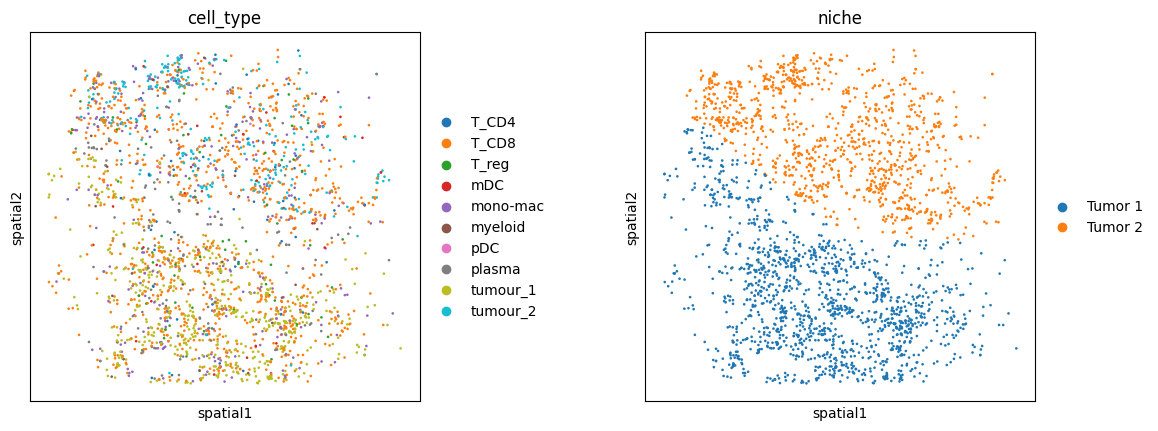

In [ ]:
adata.obs['niche'] = 'Tumor 1'
adata.obs['niche'][adata.obsm['spatial'][:,0] - 1.3 * adata.obsm['spatial'][:,1]> -1200] = 'Tumor 2'
adata.obs['niche'][adata.obsm['spatial'][:,1] > 3450] = 'Tumor 1'
sc.pl.spatial(adata,color=['cell_type','niche'],spot_size=40)

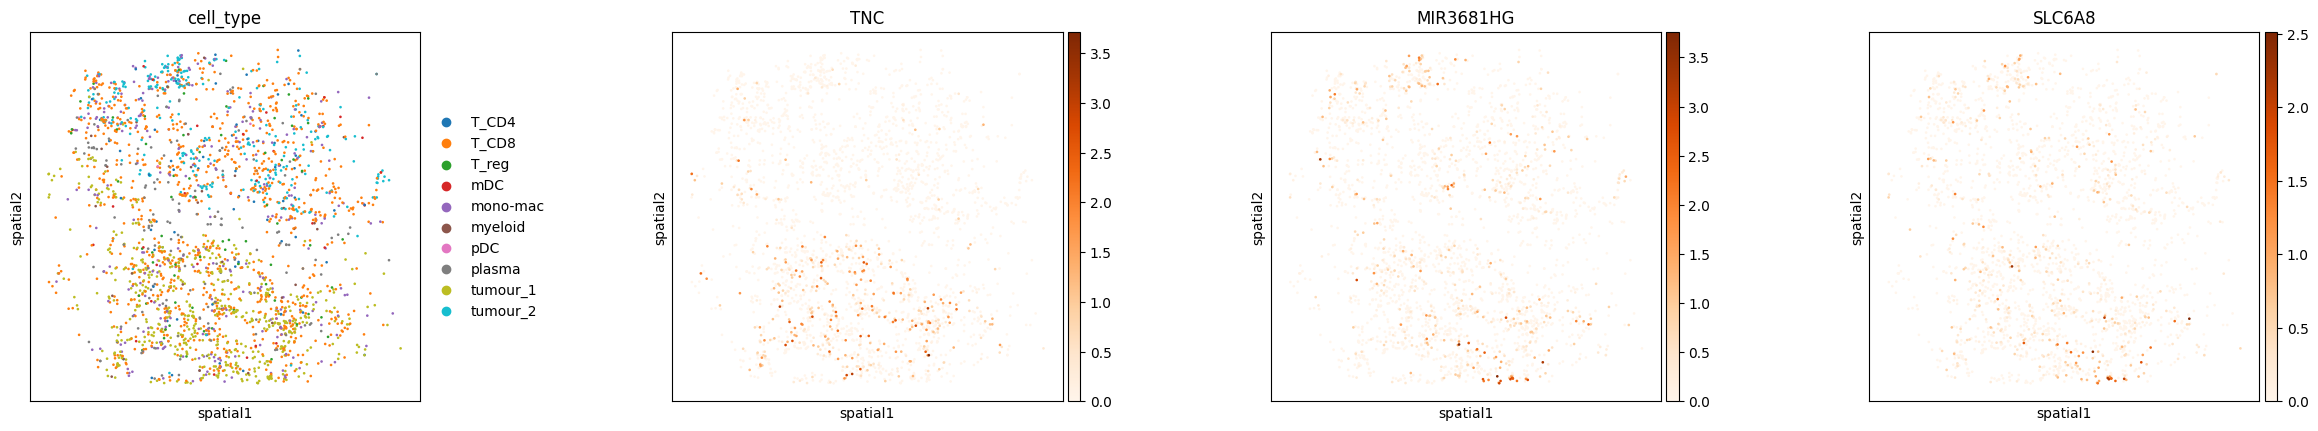

In [15]:
sc.pl.spatial(adata,color=['cell_type','TNC','MIR3681HG','SLC6A8'],spot_size=40,cmap='Oranges',save='tmptmp.png')

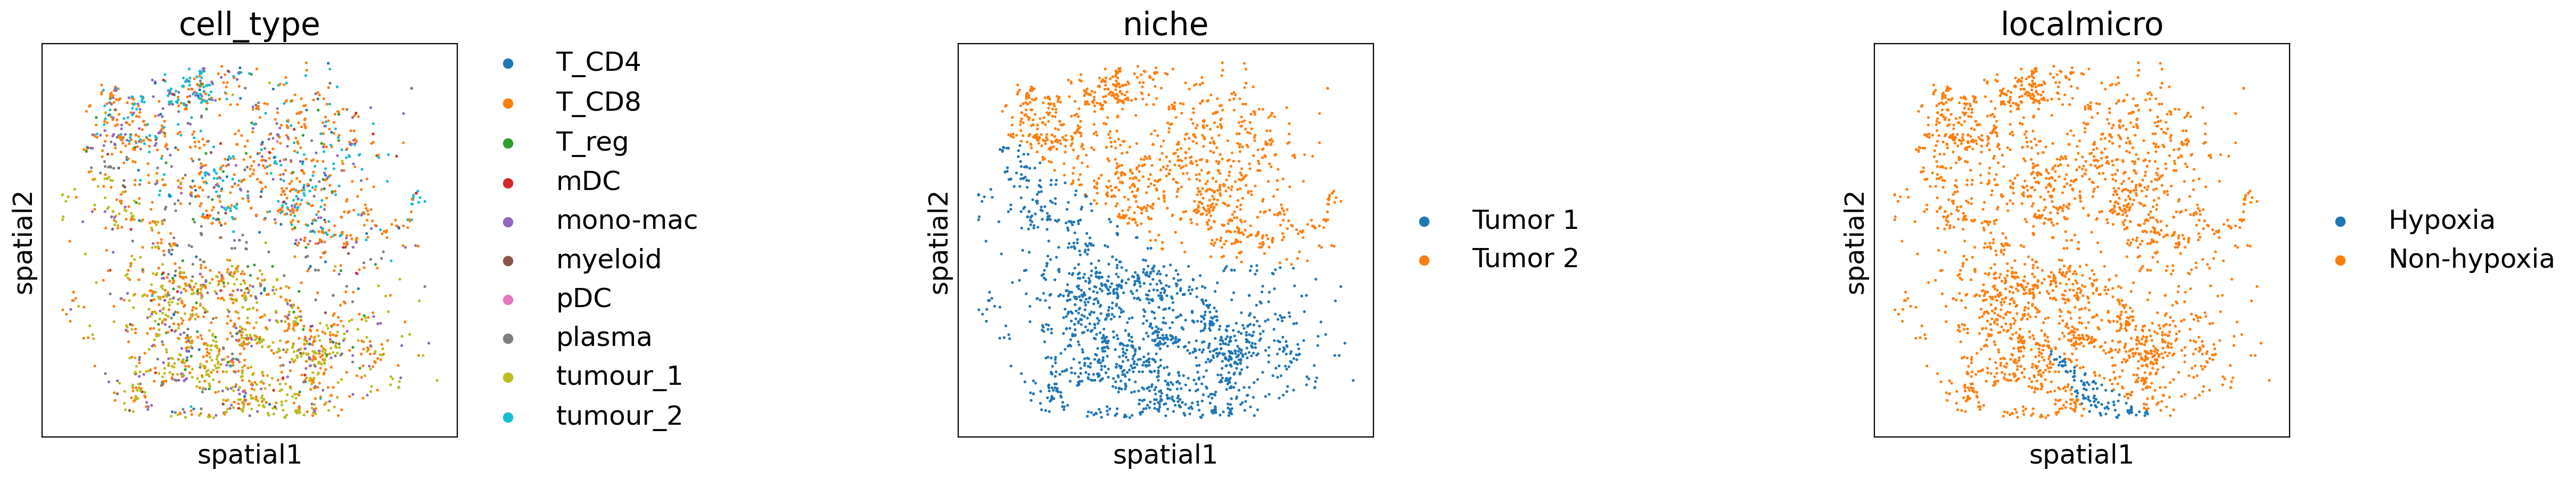

In [206]:
#adata.obs['localmicro'] = 'Hypoxia'
#adata.obs['localmicro'][adata.obsm['spatial'][:,0] - 1.6 * adata.obsm['spatial'][:,1]> -4800] = 'Non-hypoxia'
#adata.obs['localmicro'][ adata.obsm['spatial'][:,0] - 0.6 * adata.obsm['spatial'][:,1]< -150] = 'Non-hypoxia'

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams["font.size"] = 18

sc.pl.spatial(adata,color=['cell_type','niche','localmicro'],wspace=0.5,spot_size=40,cmap='Oranges',save='multiome_tmp.png')

/usr/local/lib/python3.8/dist-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


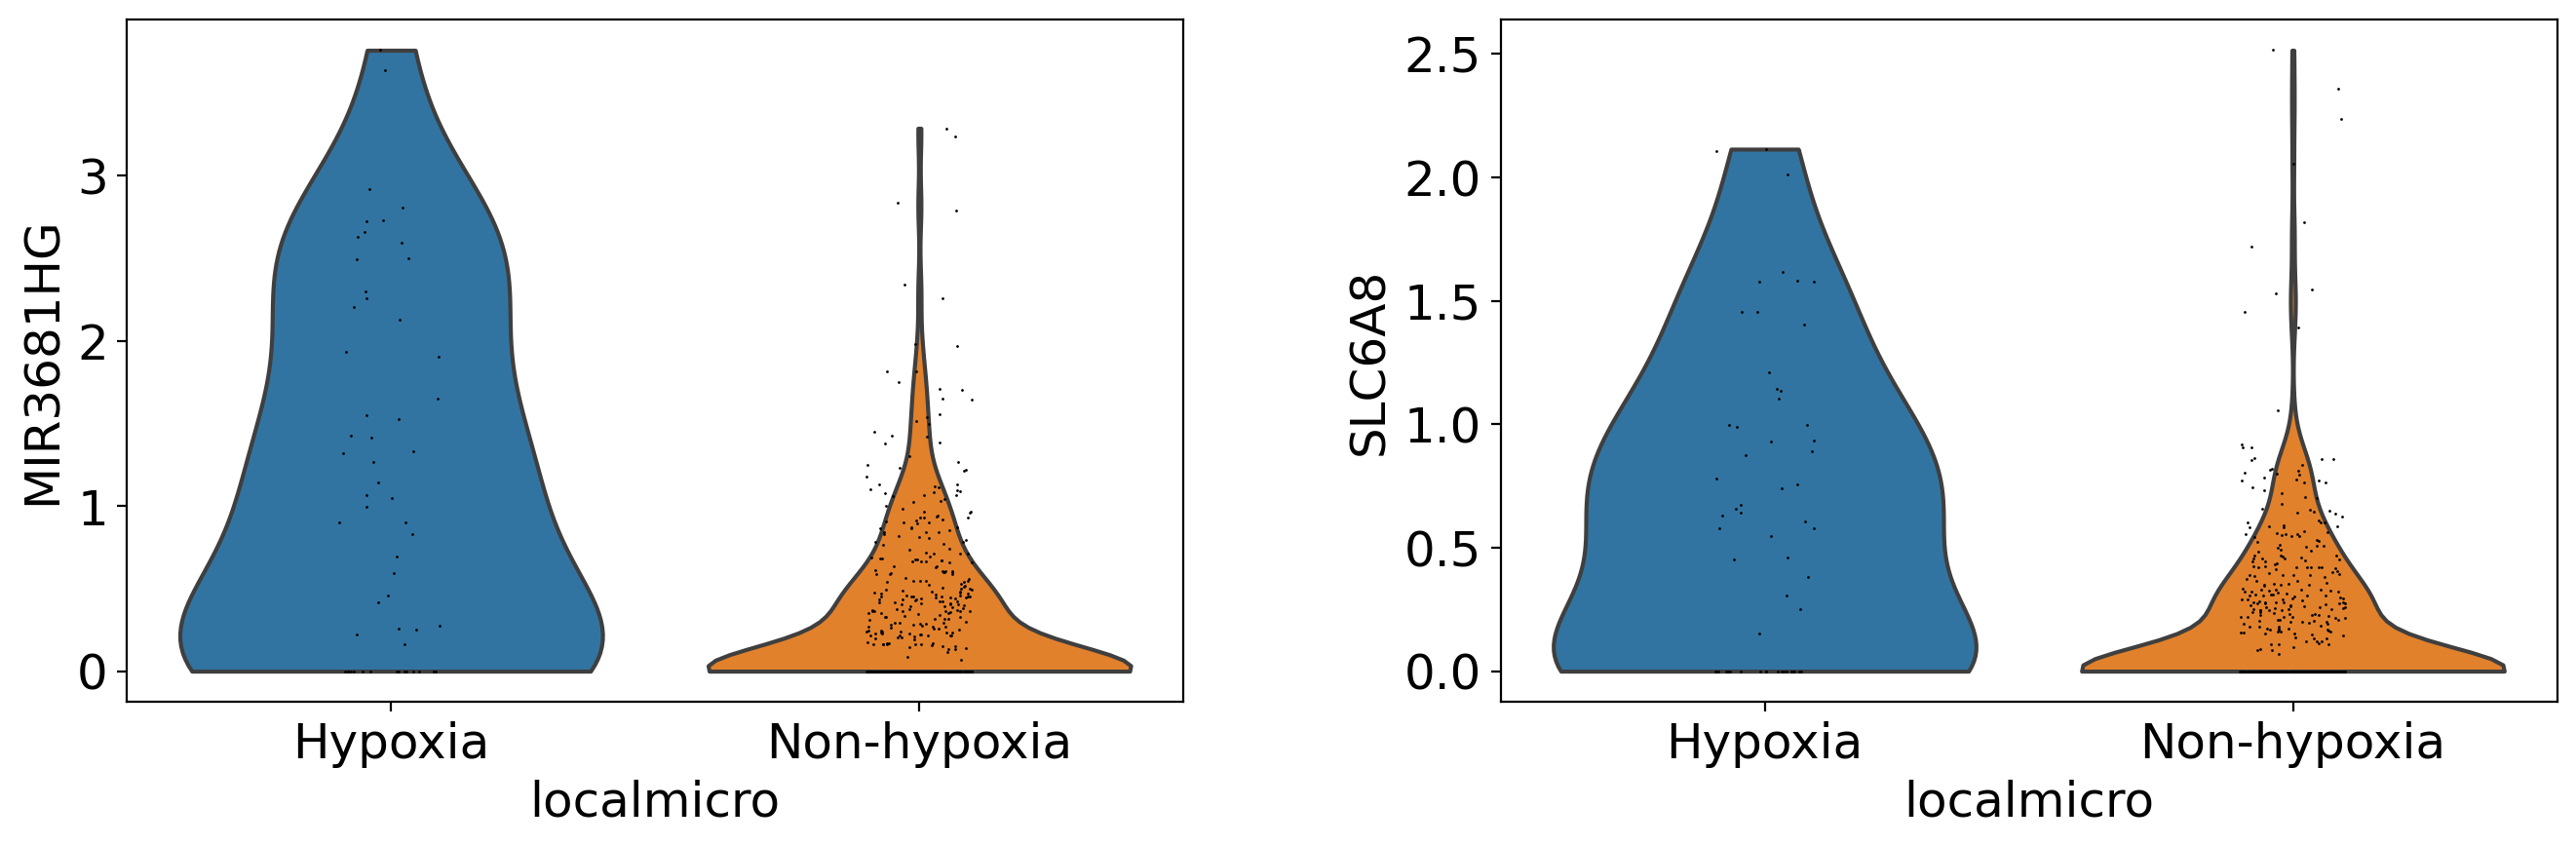

In [207]:
sc.pl.violin(adata[adata.obs['cell_type']=='tumour_1'],['MIR3681HG','SLC6A8'],'localmicro',save='multiomelocalmicro.pfg')

In [181]:
adata_immune = adata[~adata.obs['cell_type'].isin(['tumour_1','tumour_2'])].copy()

from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection
biocons = BioConservation(isolated_labels=False,nmi_ari_cluster_labels_leiden=True,nmi_ari_cluster_labels_kmeans=False,clisi_knn=False)
#bat = BatchCorrection(silhouette_batch = False, ilisi_knn=False, kbet_per_label = False, graph_connectivity = False, pcr_comparison=False)
bat_ = BatchCorrection(ilisi_knn=False)
bm = Benchmarker(
    adata_immune,
    batch_key="niche",
    label_key="cell_type",
    embedding_obsm_keys=s_list,
    pre_integrated_embedding_obsm_key='X_pca',
    bio_conservation_metrics=biocons,
    batch_correction_metrics=bat_,
    n_jobs=20,
)
bm.benchmark()

/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9

Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:03<00:11,  1.65s/it, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:08<00:14,  2.93s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|█████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:04<00:07,  1.57s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:04<00:07,  1.53s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:04<00:07,  1.54s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.13it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:05,  1.11s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.08it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:04<00:08,  1.74s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:04<00:07,  1.51s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.09it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.11it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|█████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:02,  1.71it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.13it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.31it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.19it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.61it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:02,  1.83it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:02,  1.87it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.09it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.60it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:02,  2.89it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:02,  2.71it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:02,  2.55it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:02,  2.53it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:02,  2.71it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:02,  2.56it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:02,  2.47it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:02,  2.39it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:02,  2.55it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:01,  4.22it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:05,  1.04s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|█████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.42it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.21it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.16it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.35it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.31it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.37it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.39it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.48it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.33it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:05,  1.17s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|█████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.23it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.10it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:05,  1.04s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.23it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.17it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.24it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.18it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.16it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.09it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:02,  2.43it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:02,  2.42it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.44it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:03,  2.32it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.41it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.45it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.24it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|████████████████████████████████████████████████████▊                                                                                                                           | 3/10 [00:00<00:03,  2.08it/s, Batch correction: kbet_per_label]

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:05<00:06,  1.33s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.30it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:03,  1.29it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.09it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:05,  1.03s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:05<00:07,  1.58s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.65it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.39it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.07it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.33it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.11it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.17it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.43it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.24it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:03,  1.27it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.30it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.33it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:03,  1.28it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.35it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.40it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.40it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.47it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.53it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.43it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:05<00:06,  1.32s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:06<00:07,  1.60s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:05<00:07,  1.50s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:06<00:08,  1.71s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:04<00:05,  1.07s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:04<00:05,  1.05s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.24it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.59it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.52it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:02,  1.68it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.32it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:02,  1.74it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.11it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:06<00:08,  1.66s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:06<00:08,  1.70s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:08<00:11,  2.35s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:04<00:05,  1.11s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.17it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.31it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.44it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:03,  1.28it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.36it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.32it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.04it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:05<00:07,  1.41s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.41it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.43it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:03,  1.58it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.16it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.19it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.21it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.18it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.23it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.16it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.20it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:03<00:04,  1.16it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.24it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:02<00:04,  1.20it/s, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  30%|██████

INFO     pDC consists of a single batch or is too small. Skip.                                                     



Embeddings: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [06:54<00:00,  3.43s/it]

                                                                                                                                                                                                                                                               

In [198]:
bm._results.to_csv('Benchmarking_results/multiome_ct.csv')

In [3]:
adata.obs['SIMVI niche'] = pd.read_csv('Bio_results/multiome/adata_obs.csv',index_col=0)['SIMVI niche'].values

In [217]:
bm_new = Benchmarker(
    adata,
    batch_key="cell_type",
    label_key="SIMVI niche",
    embedding_obsm_keys=s_list,
    pre_integrated_embedding_obsm_key='X_pca',
    bio_conservation_metrics=biocons,
    batch_correction_metrics=bat_,
    n_jobs=20,
)
bm_new.benchmark()

/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:04<00:05,  1.18s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|███████

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:04<00:06,  1.29s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|███████

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:05<00:06,  1.32s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|███████

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:04<00:06,  1.28s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:  50%|███████

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:05<00:07,  1.53s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|       

Metrics:  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 5/10 [00:04<00:05,  1.15s/it, Batch correction: pcr_comparison]/usr/local/lib/python3.8/dist-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|       

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

In [219]:
bm_new._results.to_csv('Benchmarking_results/multiome_simviniche.csv')

In [131]:
adata_tumor = adata[adata.obs['cell_type'].isin(['tumour_1'])].copy()

bm3 = Benchmarker(
    adata_tumor,
    batch_key="cell_type",
    label_key="localmicro",
    embedding_obsm_keys=s_list,
    pre_integrated_embedding_obsm_key='X_pca',
    bio_conservation_metrics=biocons,
    batch_correction_metrics=bat,
    n_jobs=20,
)
bm3.benchmark()

/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Embeddings: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:19<00:00,  6.08it/s]

                                                                                                                                                                                                                                       

In [199]:
bm3._results.to_csv('Benchmarking_results/multiome_hypoxia.csv')

In [150]:
adata_mp = adata[adata.obs['cell_type'].isin(['mono-mac','myeloid'])].copy()

bm4 = Benchmarker(
    adata_mp,
    batch_key="cell_type",
    label_key="niche",
    embedding_obsm_keys=s_list,
    pre_integrated_embedding_obsm_key='X_pca',
    bio_conservation_metrics=biocons,
    batch_correction_metrics=bat,
    n_jobs=20,
)
bm4.benchmark()

/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

In [200]:
bm4._results.to_csv('Benchmarking_results/multiome_mpniche.csv')